In [1]:
# 사용한 모든 라이브러리
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot  #numpy array 끼리 곱할 때 사용
from numpy.linalg import norm #벡터의 크기 측정하는 함수
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_excel("로켓펀치 100억 이상 투자유치 스타트업 사내 복지 (labeling ver.) by 김문과의 데이터.xlsx", encoding='utf-8')
df.head(3)

,회사명,개인장비,통근교통,자기계발,식사간식,근무형태,보험의료,연차휴가,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,8percent,"맥북,아이맥",NaN,"도서구입비,스터디지원,자기계발비","맥주,커피/음료,특식지원","09:00-18:00,10:00-19:00,유연근무","4대보험,건강/종합검진","리프레시 휴가,자율 휴가",제작자 블로그,김문과의 데이터,https://data101.oopy.io/
1,9minteractive,듀얼모니터,NaN,NaN,"간식,석식,커피/음료",NaN,"4대보험,건강/종합검진",NaN,NaN,NaN,NaN
2,april,"데스크탑,랩탑",역세권,NaN,"중식,커피/음료",09:30-18:30,"4대보험,경조사비","생일/결혼기념일 휴가,자율 휴가",NaN,NaN,NaN


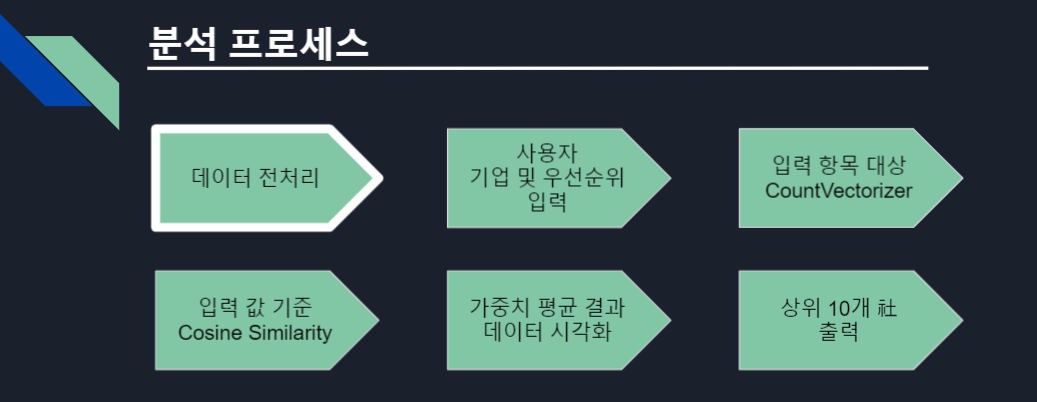

In [3]:
#불필요한 열 제거
df.drop(['Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1, inplace=True)

#띄어쓰기나 특수기호를 넣을경우, countervectorizer가 자동으로 삭제 
# -> 비교대상이 없어서져 코사인유사도 계산 시 들어가는 vector값이 NaN 나옴. 
# 문자열 empty로 채워줌. 
df.fillna(value="Empty", inplace=True)

# string을 replace할 때는 to_replace(from) & value(to) 
# 문자열 replace는 regular expression(정규표현식) regex=True 설정.
df.replace(to_replace='/', value='', regex=True, inplace=True)

# 근무형태 데이터 전처리
df['근무형태'] = df['근무형태'].str.replace('[0-9]', '')
df['근무형태'] = df['근무형태'].str.replace(':-:,', '')
df['근무형태'] = df['근무형태'].str.replace(':-:', 'Empty')
df['연차휴가'] = df['연차휴가'].str.replace(' ', '')

df

,회사명,개인장비,통근교통,자기계발,식사간식,근무형태,보험의료,연차휴가
0,8percent,"맥북,아이맥",Empty,"도서구입비,스터디지원,자기계발비","맥주,커피음료,특식지원",유연근무,"4대보험,건강종합검진","리프레시휴가,자율휴가"
1,9minteractive,듀얼모니터,Empty,Empty,"간식,석식,커피음료",Empty,"4대보험,건강종합검진",Empty
2,april,"데스크탑,랩탑",역세권,Empty,"중식,커피음료",Empty,"4대보험,경조사비","생일결혼기념일휴가,자율휴가"
3,atostudy,랩탑,주거지원,"도서구입비,동아리지원,스터디지원,직무교육비",간식,Empty,4대보험,"자기계발휴가,장기근속포상휴가,출산휴가"
4,bagelcode,"듀얼모니터,맥북",Empty,게임비용지원,"석식,조식,중식",Empty,"4대보험,경조사비,출산비",Empty
5,balaan,"듀얼모니터,맥북",Empty,직무교육비,"간식,석식,커피음료",유연근무,"4대보험,건강종합검진,경조사비","월차,자율휴가,출산휴가"
6,balancehero,"듀얼모니터,랩탑",야근교통비,"도서구입비,문화생활비,직무교육비","간식,커피음료,특식지원","유연근무,자율출퇴근","4대보험,경조사비,퇴직금","리프레시휴가,생리휴가,월차,자율휴가,장기근속포상휴가,출산휴가"
7,barunson,"듀얼모니터,아이맥",Empty,Empty,"중식,커피음료",유연근무,4대보험,자율휴가
8,best2wings,듀얼모니터,Empty,Empty,간식,"원격근무,유연근무","4대보험,건강종합검진,경조사비","생리휴가,월차,자율휴가,장기근속포상휴가,출산휴가"
9,bluewhalefoundation,"듀얼모니터,맥북",Empty,Empty,"간식,커피음료",Empty,"4대보험,경조사비","월차,출산휴가"


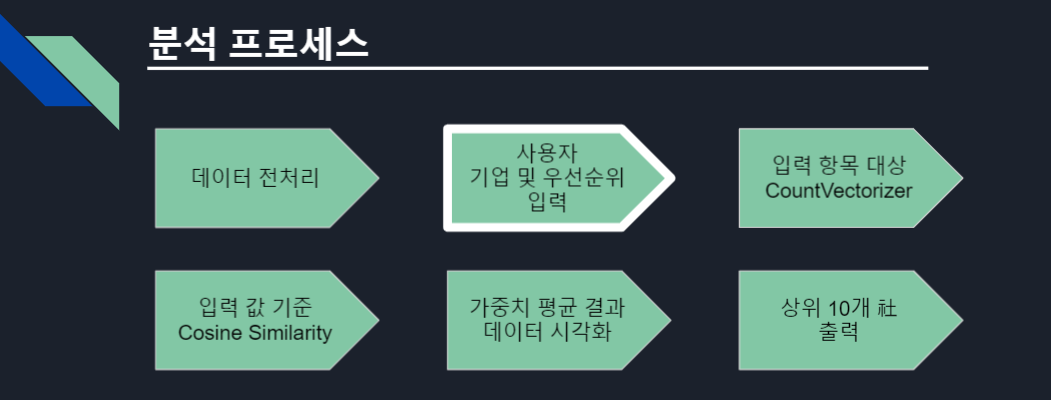

In [4]:
# 유저 인풋받기 -  방법1) 

# 회사명 input 받는 코드
while True:
    company = input('회사명을 영문으로 입력해주세요(종료 : q) : ').lower().replace(" ","")
    # 유저가 실수로 대문자 or 띄어쓰기를 추가한 경우에도 문제없이 인풋으로 받을 수 있도록 : lower, replace
    if company == 'q': # q를 입력했을 때 루프는 빠져나갈 수 있도록 
        company = '다시 실행해주세요.'
        break
    if company not in df['회사명'].values: # 데이터셋에 없는 회사를 입력하면 오류 프린트
        print('해당 회사에 대한 정보가 없습니다.')
        continue
    break
print(company)

print('🍕 [우선 순위 선택 항목: (1:개인장비, 2:통근교통, 3:자기계발, 4:식사간식, 5:근무형태, 6:보험의료, 7:연차휴가)] / 종료 : q 🍔')

dict_category = {
    '1':'개인장비', 
    '2':'통근교통', 
    '3':'자기계발', 
    '4':'식사간식', 
    '5':'근무형태', 
    '6':'보험의료', 
    '7':'연차휴가'
}
keys = list(dict_category.keys())
while True:
    first = input('1순위 선택 항목을 입력해주세요 : ' )
    if first == 'q':
        first = '실행이 종료됩니다. 다시 실행해주세요.'
        break
    if first not in keys:
        print('선택 항목을 벗어났습니다.') # 1-7을 벗어난 index 입력시 오류 프린트
        continue
    break
while True:
    second = input('2순위 선택 항목을 입력해주세요 : ' )
    if second == 'q':
        second = '실행이 종료됩니다. 다시 실행해주세요.'
        break
    if second not in keys:
        print('선택 항목을 벗어났습니다.')
        continue
    elif second == first:
        print('1순위 항목과 중복됩니다.') # 인풋이 중복되었을 때도 오류를 프린트
        continue
    break
while True:
    third = input('3순위 선택 항목을 입력해주세요 : ' )
    if third == 'q':
        third = '실행이 종료됩니다. 다시 실행해주세요.'
        break
    if third not in keys:
        print('선택 항목을 벗어났습니다.')
        continue
    elif third == first:
        print('1순위 항목과 중복됩니다.')
        continue
    elif third == second:
        print('2순위 항목과 중복됩니다.')
        continue
    break
    
first = dict_category[first] 
second = dict_category[second]
third = dict_category[third]

inputs = [first, second, third]

print('\n','회사명:',company,'\n','선택된 복지혜택:', '1️⃣',first,'2️⃣', second,'3️⃣', third)

회사명을 영문으로 입력해주세요(종료 : q) : April
april
🍕 [우선 순위 선택 항목: (1:개인장비, 2:통근교통, 3:자기계발, 4:식사간식, 5:근무형태, 6:보험의료, 7:연차휴가)] / 종료 : q 🍔
1순위 선택 항목을 입력해주세요 : 1
2순위 선택 항목을 입력해주세요 : 2
3순위 선택 항목을 입력해주세요 : 4

 회사명: april 
 선택된 복지혜택: 1️⃣ 개인장비 2️⃣ 통근교통 3️⃣ 식사간식


In [5]:
# 유저 인풋받기 - 방법 2) 

inputs = []
inputs_index = { #유저가 '개인장비' 문자열을 입력하는 대신, index번호를 입력시키도록
    1 : '개인장비',
    2 : '통근교통',
    3 : '자기계발',
    4 : '식사간식',
    5 : '근무형태',
    6 : '보험의료',
    7 : '연차휴가'
}
def check_duplicates(x): # 기존에 입력했던 인덱스 중복 여부 체크 함수
    while True:
        if inputs_index[x] in inputs:
            x = int(input('이미 선택하신 index 번호입니다. 다른 index를 입력해주세요: '))
            x = check_range(x)
        else:
            break
    inputs.append(inputs_index[x])
    return x
def check_range(x):  # 인덱스 번호가 유효한지 점검하는 함수 
    while True:
        if x not in inputs_index.keys():
            x = int(input('존재하지않는 index 번호입니다. 다른 index를 입력해주세요: '))
        else:
            break
    return x

num = 1 # 1 == True
while num: # 조건이 false가 될 때까지 while문 반복
    company = input('회사명을 영문으로 입력해주세요 : ').lower().replace(" ","")
    # "8   PerCent" -> "8percent"로 이해할 수 있도록
    if company not in df['회사명'].values:
        if company == 'q': # exit loop 루프 나오기
            break
        print('해당 회사에 대한 정보가 없습니다.')
    else:
        num = 0 # == while false : 루프 그만
        print('🍕 복지혜택[index 번호]: 개인장비[0], 통근교통[1], 자기계발[2], 식사간식[3], 근무형태[4], 보험의료[5], 연차휴가[6] 🍔', end='\n\n')
        x1 = int(input('1순위 복지혜택 index번호를 입력해주세요: '))
        x1_valid = check_range(x1)
        inputs.append(inputs_index[x1_valid])
        print('1️⃣',inputs_index[x1_valid], end='\n')
        
        x2 = int(input('2순위 복지혜택 index번호를 입력해주세요: '))
        x2_valid = check_range(x2) #유효한 인덱스를 입력했는가? 확인
        x2_aft = check_duplicates(x2_valid) #중복된 인덱스인가? 확인
        print('2️⃣',inputs_index[x2_aft], end='\n')
        
        x3 = int(input('3순위 복지혜택 index번호를 입력해주세요: '))
        x3_valid = check_range(x3)
        x3_aft = check_duplicates(x3_valid)
        print('3️⃣',inputs_index[x3_aft], end='\n')

print('\n','회사명:',company,'\n','선택된 복지혜택:', inputs)

회사명을 영문으로 입력해주세요 : April
🍕 복지혜택[index 번호]: 개인장비[0], 통근교통[1], 자기계발[2], 식사간식[3], 근무형태[4], 보험의료[5], 연차휴가[6] 🍔

1순위 복지혜택 index번호를 입력해주세요: 1
1️⃣ 개인장비
2순위 복지혜택 index번호를 입력해주세요: 2
2️⃣ 통근교통
3순위 복지혜택 index번호를 입력해주세요: 4
3️⃣ 식사간식

 회사명: april 
 선택된 복지혜택: ['개인장비', '통근교통', '식사간식']


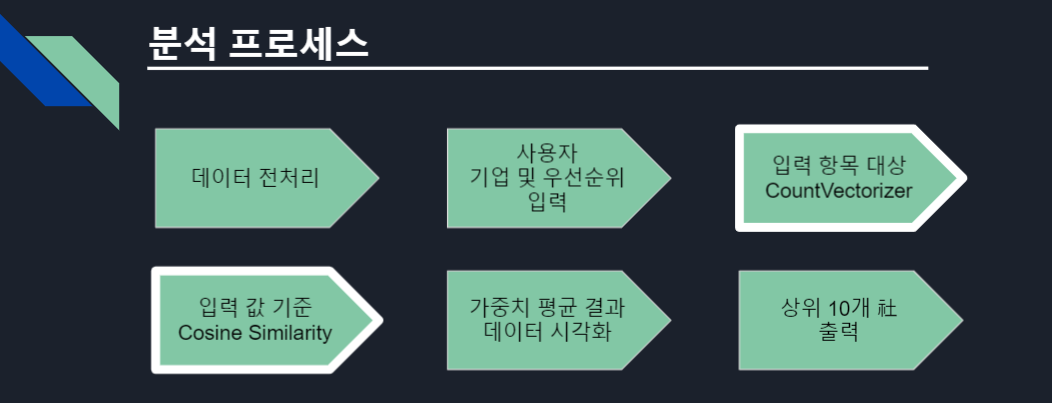

In [6]:
corpus = []
for value in df['자기계발']: # 예시로 자기계발열만 선택
    corpus.append(value)
# CountVectorizer
vector = CountVectorizer()
arr_column1 = vector.fit_transform(corpus).toarray() # 단어 빈도수 기록
print(vector.vocabulary_) # 각 단어에 부여된 인덱스
pd.DataFrame(arr_column1).head()

{'도서구입비': 3, '스터디지원': 10, '자기계발비': 13, 'empty': 0, '동아리지원': 4, '직무교육비': 16, '게임비용지원': 2, '문화생활비': 5, '세미나참가비': 9, '자사크레딧지원': 15, '체력단련비': 17, '건강지원비': 1, '복지포인트': 7, '외국어학습지원': 12, '복리후생비': 6, '본인학자금지원': 8, '자녀학자금지원': 14, '여행비지원': 11}


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# TfidfVectorizer
tfidfv = TfidfVectorizer().fit(corpus)
arr_column2 = tfidfv.transform(corpus).toarray() # 단어 빈도수에 중요 가중치를 반영하여 기록
print(tfidfv.vocabulary_)
pd.DataFrame(arr_column2).head()

{'도서구입비': 3, '스터디지원': 10, '자기계발비': 13, 'empty': 0, '동아리지원': 4, '직무교육비': 16, '게임비용지원': 2, '문화생활비': 5, '세미나참가비': 9, '자사크레딧지원': 15, '체력단련비': 17, '건강지원비': 1, '복지포인트': 7, '외국어학습지원': 12, '복리후생비': 6, '본인학자금지원': 8, '자녀학자금지원': 14, '여행비지원': 11}


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.413300,0.000000,0.0,0.0,0.0,0.0,0.0,0.617357,0.0,0.0,0.669368,0.0,0.0,0.000000,0.0
1,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.378684,0.517995,0.0,0.0,0.0,0.0,0.0,0.565650,0.0,0.0,0.000000,0.0,0.0,0.517995,0.0
4,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [20]:
import warnings
warnings.filterwarnings("ignore") 

weights = {0:0.5, 1:0.3, 2:0.2} 

df_temp = df.copy()
df_final = df_temp[['회사명']]
for index, inPut in enumerate(inputs): # inputs내 3가지 복지혜택 열 모두에 적용
    # 차후 enumerate(inputs): {0:1순위복지,1:2순위복지,2:3순위복지}와 대응
    corpus = []
    for value in df[inPut]:
        corpus.append(value)
    vector = CountVectorizer()
    arr_column = vector.fit_transform(corpus).toarray() #코퍼스(inPut의 value)로부터 각 단어의 빈도수를 기록
    print(vector.vocabulary_) 
#     print(pd.DataFrame(arr_column).head())
    
    #cosine similarity
    #유저가 선택한 기업의 index를 기준으로, 나머지 docs(회사)들의 상대적인 유사도 도출
    #그러려면 선택한 회사의 index 번호를 알아야 한다. 그 회사의 행렬을 뽑기 위해서는
    picked_index = df.index.values[df['회사명']==company][0]
    
    #코사인 유사도 계산함수. !=cosine_similarity 공식
    def cos_sim(A,B): 
        # 분모가 0일 경우: RuntimeWarning: invalid value encountered in true_divide <- 해당 에러 발생...
        np.seterr(divide = 'ignore', invalid = 'ignore')
        return dot(A, B)/(norm(A)*norm(B))
    
    sim_list = []
    
    doc1 = arr_column[picked_index] # 기준열
    for doc2 in arr_column : #상대열  
        sim_list.append(cos_sim(doc1,doc2)) 
        
    df_temp[inPut] = sim_list #df_temp (만들어 놓은 new데이터프레임) (유저가 입력한 기준 열의) value값을 코사인유사도값으로 대체(위에서 각 inPut의 코사인유사도 구한것)
    df_final[inPut] = [x*weights[index] for x in sim_list] #만들어놓은 데이터프레임에 위의 리스트에서 코사인유사도 값을 하나씩 받아 
    df_temp.head()
        
df_temp
        
df_final['Total'] = df_final[inputs].sum(axis=1)  

df_final= df_final.sort_values(by='Total', ascending=False).head(10)
df_final.head()
# df_final                
# 코사인 유사도 계산 함수. cosine_similarity는 df를 인풋으로 받으나, 이 함수는 numpy array를 input으로 받음.

{'맥북': 4, '아이맥': 8, '듀얼모니터': 2, '데스크탑': 1, '랩탑': 3, 'empty': 0, '스탠딩책상': 7, '사무용품': 6, '브랜드가구': 5, '안마의자': 9, '종합적지원': 12, '업무용폰': 10, '입사축하금': 11}
{'empty': 0, '역세권': 3, '주거지원': 8, '야근교통비': 2, '교통비지원': 1, '유류비지원': 5, '전기차구매시보험료지원': 7, '주차지원': 9, '자사서비스크레딧': 6, '영업활동비지원': 4}
{'맥주': 3, '커피음료': 12, '특식지원': 13, '간식': 1, '석식': 7, '중식': 11, '조식': 10, '과일': 2, '명절상품권상여금': 4, 'empty': 0, '외근식대': 8, '생일상여': 6, '복지몰': 5, '자사제품할인': 9}


,회사명,개인장비,통근교통,식사간식,Total
2,april,0.500000,0.3,0.200000,1.000000
67,peoplefund,0.408248,0.0,0.126491,0.534739
47,madit,0.408248,0.0,0.081650,0.489898
79,simpleprojectco,0.408248,0.0,0.070711,0.478959
13,channelbreeze,0.353553,0.0,0.100000,0.453553


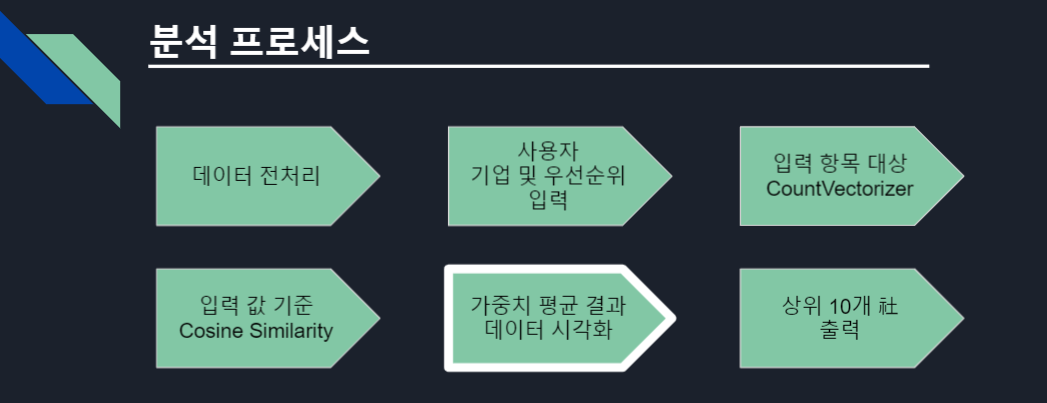

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# matplotlib의 한글문제를 해결
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name
rc('font', family=font_name)

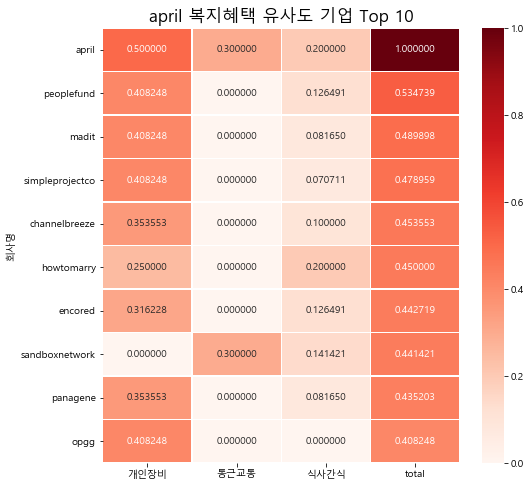

In [11]:
# df_final_score = df_final.sort_values(by='Total', ascending=False).head(10)
# df_final_score = df_final_score.drop(['Total'], axis =1).head(10)
# df_final_score.set_index('회사명')
df_temp

df_final_top10 = df_final.sort_values(by='Total',ascending=False).head(10)
plt.figure(figsize = (8,8))
sns.heatmap(df_final_top10.set_index('회사명').sort_values(by='Total', ascending=False),annot=True, fmt='f', linewidths=.2, cmap='Reds')

plt.title('{} 복지혜택 유사도 기업 Top 10'.format(company), size=17)
plt.show()

Text(0.5, 1.0, 'april 복지혜택 유사도 기업 Top 10')

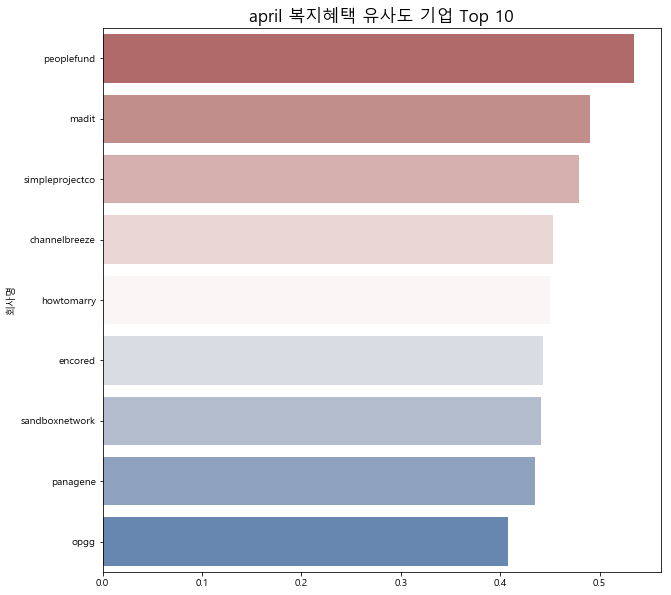

In [12]:
top10 = df_final.set_index('회사명').sort_values(by='total',ascending=False).iloc[1:11,-1]

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.figure(figsize = (10,10))
sns.barplot(y = top10.index, x= top10.values, palette = 'vlag_r', orient="h") #horizontal : x,y값 바꿔주기. Greens_r
plt.title('{} 복지혜택 유사도 기업 Top 10'.format(company), size=17)

In [13]:
np_final = df_final.to_numpy()

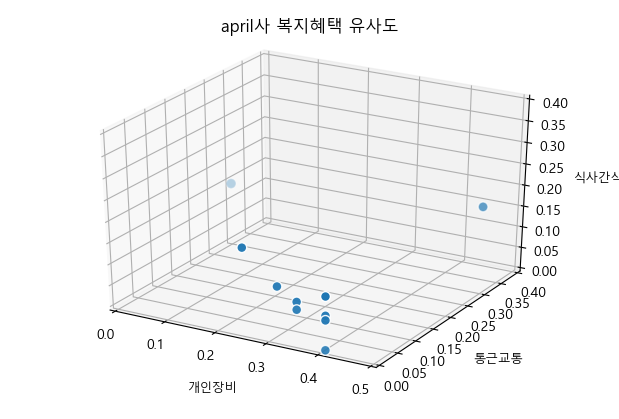

In [14]:
# PCA plot of 3 PCs

fig = plt.figure(dpi=100)
ax = Axes3D(fig) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)

ax.scatter(np_final[:, 1], np_final[:, 2], np_final[:, 3], marker = 'o', edgecolor='w', s=50) #  c=iris.target,
# ax.w_xaxis.set_ticklabels(fontsize=7)
# ax.w_yaxis.set_ticklabels(fontsize=7)
# ax.w_zaxis.set_ticklabels(fontsize=7)
ax.set_xlabel(first, labelpad=13, fontsize=9)
ax.set_ylabel(second, labelpad=13, fontsize=9)
ax.set_zlabel(third, labelpad=13, fontsize=9)
ax.set_zlim([0,0.4])
ax.dist = 11 # 값이 커지면 전체 plot 이 작아짐

plt.suptitle(company + '사 복지혜택 유사도')
plt.xlim([0,0.5])
plt.ylim([0,0.4])
plt.show()

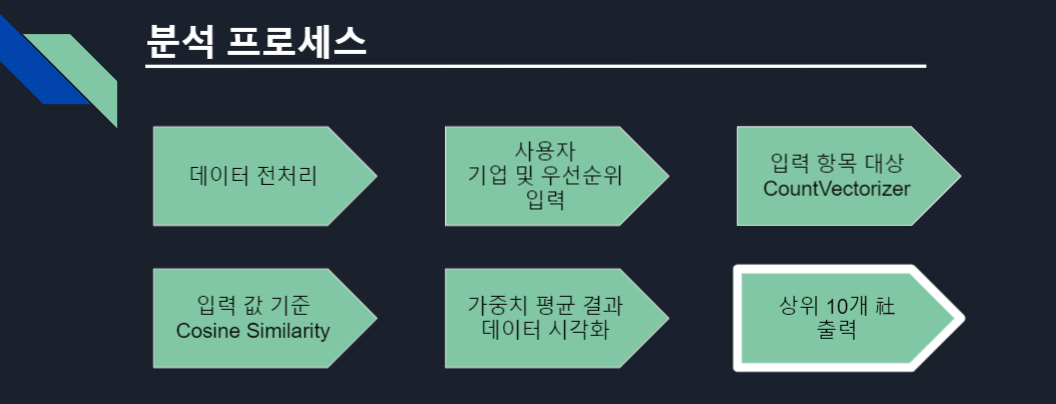

In [15]:
# print('{} 복지혜택 유사도 기업 Top 10'.format(company))
# print(df_final['회사명'].to_list())

top10

회사명
peoplefund         0.534739
madit              0.489898
simpleprojectco    0.478959
channelbreeze      0.453553
howtomarry         0.450000
encored            0.442719
sandboxnetwork     0.441421
panagene           0.435203
opgg               0.408248
Name: total, dtype: float64